<a href="https://colab.research.google.com/github/Ssendags/Data-science-Project-2---Denis-Ssendagire/blob/main/Ssendagire_Denis_Belt_Exam_3_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Mounting Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing libraries.
import pandas as pd

In [5]:
# Loading the data.
filename = '/content/drive/MyDrive/Colab Notebooks/option_A_clustering_df - option_A_clustering_df.csv'
df = pd.read_csv(filename)
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.184194,47.730389


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa

The data type for all entries is numerical (int), there are no missing values. The dataset has 4944 rows and 22 columns.

In [7]:
# Checking for duplicates
df.duplicated().sum()

29

In [8]:
# Dropping duplicates.
df = df.drop_duplicates()

In [9]:
# Checking data statistics.
df.describe()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
count,4.915000e+03,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,...,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,6.645444e+05,1179.083418,51.959919,347.439064,26.524517,1937.448627,596.627874,334.984334,102.333672,170.879959,...,8.236623,148.607121,4.441913,3.379451,0.387792,0.627263,1.320244,1971.915768,-122.271623,47.572308
std,2.985774e+05,444.925946,174.811762,544.865685,114.672475,765.663840,567.978214,423.696071,187.330438,239.934554,...,37.495879,201.620800,18.695589,0.945969,0.506142,0.652341,0.610240,32.816671,0.086500,0.127344
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,-122.526072,47.213547
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1952.000000,-122.346012,47.488558
50%,6.300000e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1966.000000,-122.291694,47.576855
75%,7.899500e+05,1450.000000,0.000000,580.000000,0.000000,2370.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,250.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2015.000000,-122.192353,47.680911
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,620.000000,1940.000000,100.000000,8.000000,3.000000,4.000000,5.000000,2019.000000,-122.090088,47.777422


In [10]:
# Import Libraries.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
# Scale the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,-0.886106,0.923656,-0.297264,-0.637725,-0.23133,1.623007,1.749140,2.962367,-0.546329,1.788670,...,-0.21969,0.354131,-0.237616,2.770511,-0.766251,2.104538,-0.524838,-0.210761,0.869736,-1.854932
1,-0.637402,0.474097,-0.297264,-0.637725,-0.23133,0.342942,0.375708,1.121238,-0.546329,-0.712267,...,-0.21969,0.949368,-0.237616,0.656060,1.209680,-0.961655,-0.524838,-0.820269,-1.043917,-0.490331
2,0.011407,-0.380065,-0.297264,2.143060,-0.23133,0.767453,-1.050548,-0.790705,-0.546329,0.955024,...,-0.21969,-0.737137,-0.237616,0.656060,1.209680,-0.961655,1.114030,1.434912,1.328909,-1.058280
3,-0.018571,-1.166792,-0.297264,0.353446,-0.23133,-0.153410,0.041154,0.672757,-0.546329,-0.712267,...,-0.21969,-0.241106,-0.237616,-0.401165,1.209680,-0.961655,1.114030,1.343485,-1.140326,-0.056249
4,-0.026945,2.542067,-0.297264,-0.637725,-0.23133,0.486623,-1.050548,-0.790705,-0.546329,1.121753,...,-0.21969,0.850162,-0.237616,-0.401165,-0.766251,-0.961655,1.114030,-0.149810,1.010839,1.241497


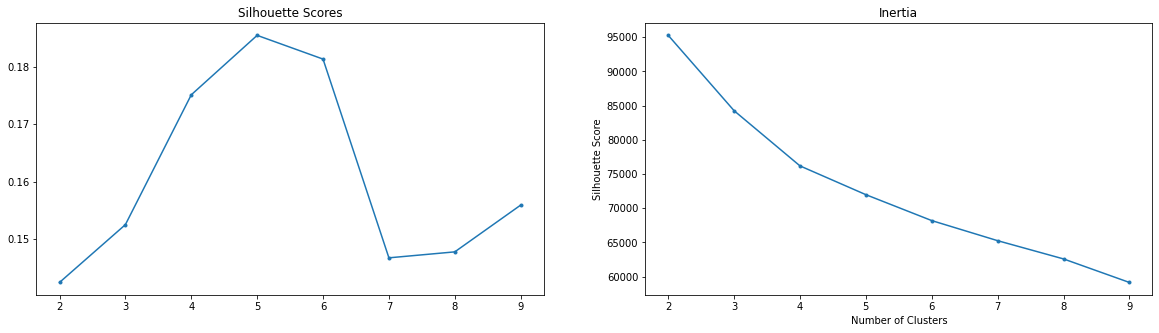

In [12]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,10)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_df)
  sils.append(silhouette_score(scaled_df, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[1].plot(ks, inertias, marker = '.')
axes[1].set_title('Inertia')
axes[1].set_xticks(ks)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
axes[0].plot(ks, sils, marker = '.')
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

From the visualisation above the elbow method does not give a clear value for k but 5 is the most optimum given its silhouette score.

In [13]:
# Refitting KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)
# Adding the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude,cluster
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,220,0,6,0,2,1,1965,-122.196399,47.336118,2
1,474250,1390,0,0,0,2200,810,810,0,0,...,340,0,4,1,0,1,1945,-122.361913,47.509874,2
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,4,1,0,2,2019,-122.156684,47.437557,4
3,659000,660,0,540,0,1820,620,620,0,0,...,100,0,3,1,0,2,2016,-122.370252,47.565146,1
4,656500,2310,0,0,0,2310,0,0,0,440,...,320,0,3,0,0,2,1967,-122.184194,47.730389,3


In [14]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,0,800569.378238,1308.393782,129.222798,104.507772,10.310881,2074.663212,1030.466321,523.937824,135.233161,...,4.766839,98.393782,92.979275,3.222798,0.352332,0.523316,1.176166,1947.637306,-122.313914,47.609316
1,1,699416.967352,562.315599,6.339782,557.292624,147.264813,1536.906892,374.007255,267.320435,102.137848,...,16.070133,299.377267,0.000000,2.756953,0.530834,0.908102,1.240629,2015.915357,-122.332590,47.616170
2,2,701105.388093,1412.025622,24.296910,82.800301,0.000000,2324.215524,1229.103994,805.243406,243.906556,...,6.053504,206.767898,1.555388,3.830445,0.403919,0.942728,1.316503,1965.336096,-122.250080,47.578438
3,3,529702.510753,1199.045699,91.982796,67.500000,0.000000,1435.270430,347.100538,81.279570,25.956989,...,7.876344,67.243548,0.843011,3.027957,0.207527,0.286022,1.096237,1947.485484,-122.283790,47.554594
4,4,872449.639831,1375.221751,30.889831,1399.980226,9.307910,2962.275424,208.494350,147.621469,28.895480,...,5.070621,90.925141,0.360169,4.227401,0.673729,0.632768,2.048023,2003.652542,-122.197298,47.546035


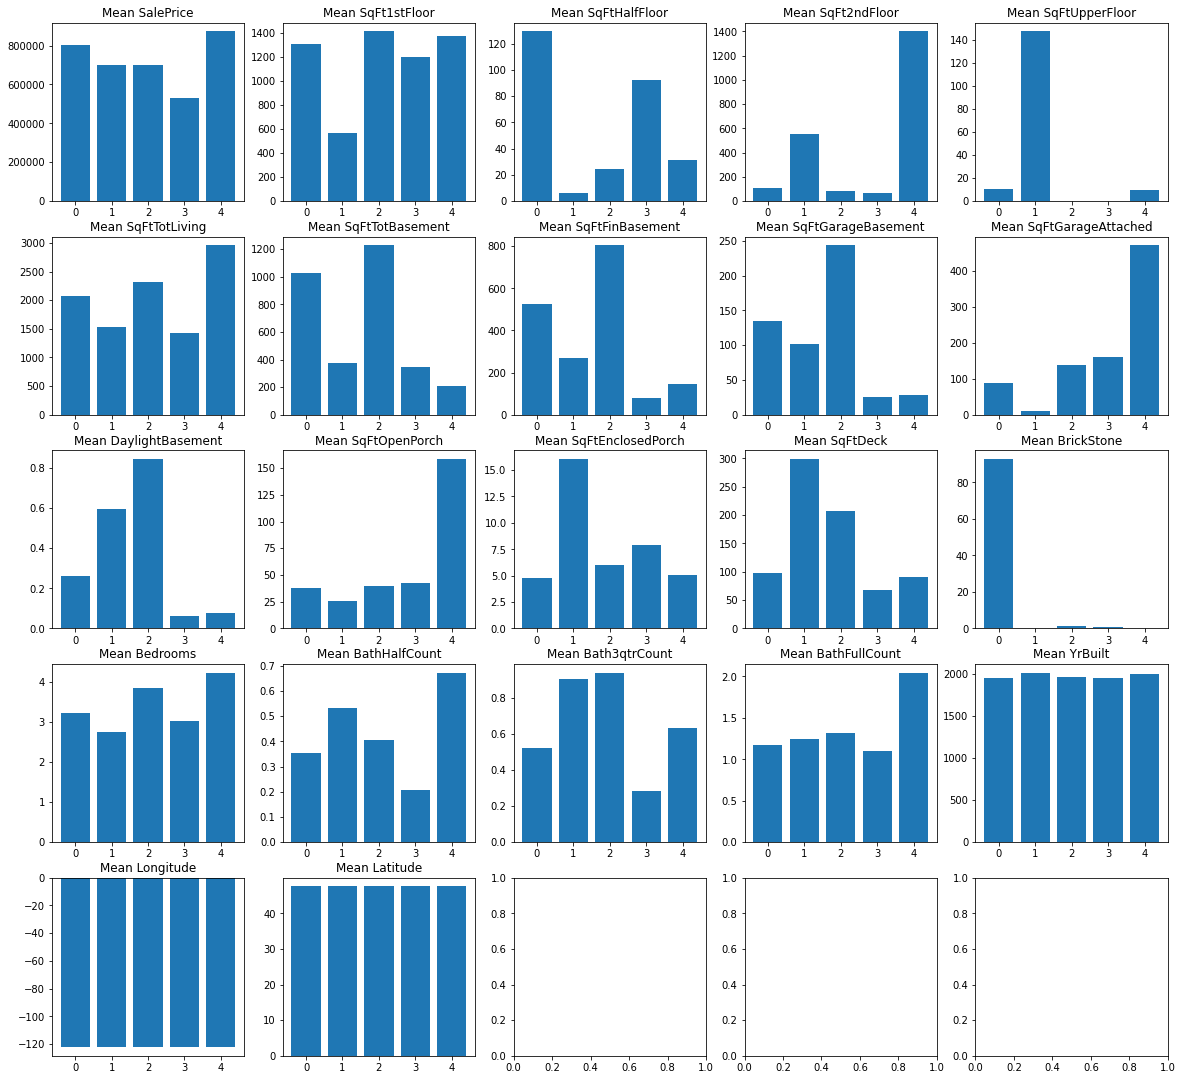

In [15]:
# Visualize means 
fig, axes = plt.subplots(5,5, figsize = (20, 19))
# fig is an array of dimensions 3,7.  axes.ravel() will flatten it to 21,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

Visualising with scatter plot.

# **Explanatory visualisation of the clusters.**

In [16]:
#predict the labels of clusters.
label = kmeans.fit_predict(df)
kmeans5 = KMeans(n_clusters = 5)
kmeans5.fit(scaled_df)

KMeans(n_clusters=5)

In [17]:
# Converting to NumPy array
df = np.array(df)
u_labels = np.unique(label)

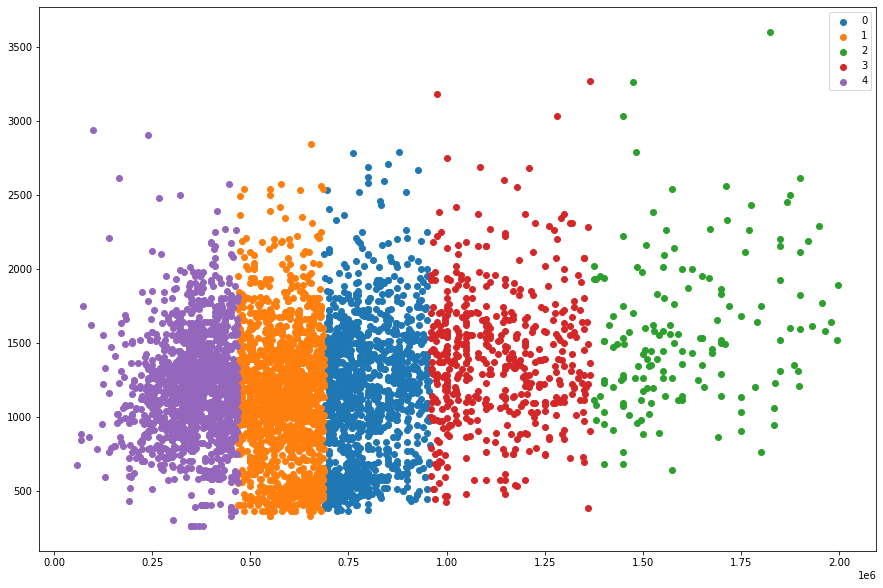

In [40]:
plt.figure(figsize = (15, 10))
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()

# **Modeling the Dataset.**

In [19]:
# Load Data
filename = '/content/drive/MyDrive/Colab Notebooks/option_A_modeling_df - option_A_modeling_df.csv'
df1 = pd.read_csv(filename)
df1.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0


In [20]:
# Exploring the data.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB


In [21]:
# Checking for duplicates
df1.duplicated().sum()

0

In [22]:
# Assigning 'SalePrice' as target vector.
y = df1['SalePrice']
X = df1.drop(columns="SalePrice")
X.head()

,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,1590,0,0,0,3180,1590,1590,0,600,1,...,0,0,0,0,0,0,1,0,0,0
1,1390,0,0,0,2200,810,810,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1010,0,1515,0,2525,0,0,0,400,0,...,0,0,0,0,0,0,0,0,1,0
3,660,0,540,0,1820,620,620,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,2310,0,0,0,2310,0,0,0,440,0,...,0,0,0,1,0,0,1,0,0,0


In [23]:
# # Train-test split the dataset.
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [24]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [25]:
# y = y.reshape(y.shape[0], -1, 1)

In [26]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

In [27]:
# Instantiate, fit & transform data using PCA
pca = PCA(n_components=5)
pcs = pca.fit_transform(scaled_df)

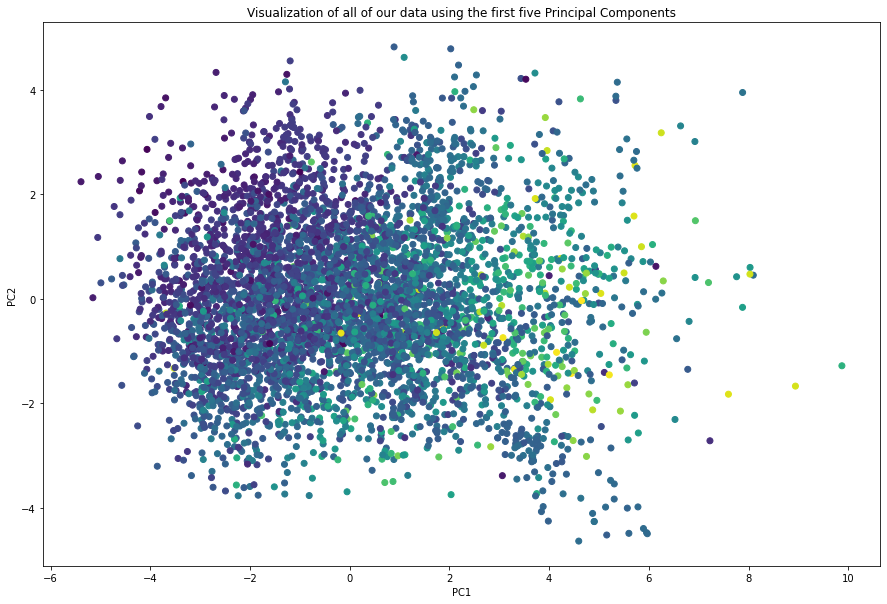

In [39]:
# Visualize the first 5 PCs
plt.figure(figsize = (15, 10))
plt.scatter(pcs[:,0], pcs[:,4], c = y)
plt.title('Visualization of all of our data using the first five Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

Text(0, 0.5, 'Cumulative Variance')

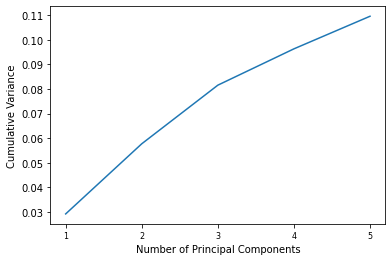

In [29]:
# # Plotting the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1, 6), pca.explained_variance_ratio_.cumsum())
plt.xticks(ticks=range(1,6), fontsize=8)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")

In [30]:
# Import libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [31]:
# Save the input shape
input_shape = pcs.shape[1]
input_shape

5

In [32]:
# Sequential model
model = Sequential()

In [33]:
# First hidden layer
model.add(Dense(18, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(11, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

In [34]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [35]:
model.compile(optimizer='adam',loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [36]:
# Step 3: Fit our model
history = model.fit(pcs, y,
                    validation_data = (pcs, y), 
                    epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


155/155 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
155/155 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
155/155 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
155/155 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
155/155 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
155/155 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/20
155/155 [==============================] - 0s 3ms/st

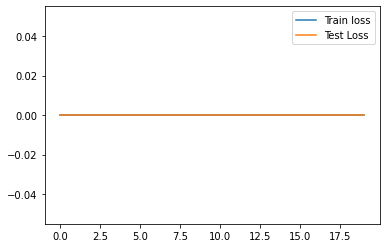

In [37]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [38]:

# First hidden layer
model.add(Dense(18, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(11, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?